<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/05_05_01_dmd_b5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define the functions
def f1(xx, tt):
#    y_1 = 2 * np.cos(xx) * np.exp(1j * tt)
    y_1 = 2 * np.cos(xx) * np.exp((0.2+2*np.pi*2*1j) * tt)
    return y_1

def f2(xx, tt):
#    y_2 = np.sin(xx) * np.exp(3j * tt)
    y_2 = np.sin(xx) * np.exp((-0.2+2*np.pi*1*1j) * tt)
    return y_2

def f3(xx, tt):
#    y_3 = 0.5*np.sin(2*xx) * np.exp(5j * tt)
    y_3 = 1*np.sin(2*xx) * np.exp((-0.1+2*np.pi*1*1j) * tt)
    return y_3


In [3]:
#Define time and space discretizations
xi = np.linspace(-10, 10, 401)
t = np.linspace(0, 5, 601)
dt = t[1] - t[0]
tt, xx = np.meshgrid(t,xi)

noisy = True
if noisy:
        # Calculate the noise levels
        noise_level = 0.0  # Adjust as needed
        noise1 = np.random.normal(scale=noise_level, size=tt.shape)
        noise2 = np.random.normal(scale=noise_level, size=tt.shape)
        noise3 = np.random.normal(scale=noise_level, size=tt.shape)
        f1_noisy = f1(xx, tt) + noise1
        f2_noisy = f2(xx, tt) + noise2
        f3_noisy = f3(xx, tt) + noise3
        # Combine the noisy functions
        X = f1_noisy + f2_noisy + f3_noisy
else:
        f1 = f1(xx, tt)
        f2 = f2(xx, tt)
        f3 = f3(xx, tt)
        X = f1 + f2 + f3


In [4]:
print(X.shape)

(401, 601)


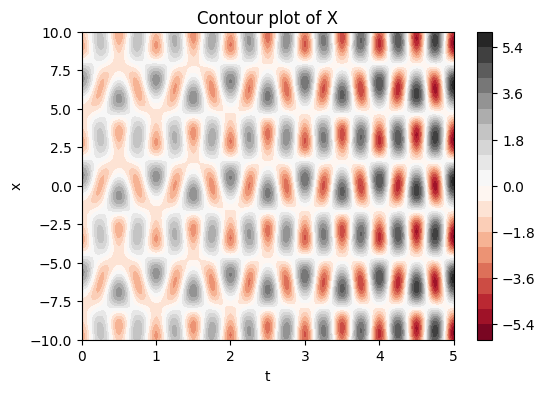

In [5]:
plt.figure(figsize=(6, 4))
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of X')
plt.show()

In [6]:
X_1 = X[:, :-1]
X_2 = X[:, 1:]


In [7]:
print(X_1.shape, X_2.shape)

(401, 600) (401, 600)


In [8]:
U, S, VT = np.linalg.svd(X_1,full_matrices=0)
V=VT.conj().T
S=np.diag(S)
print(U.shape,S.shape, V.shape)


(401, 401) (401, 401) (600, 401)


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


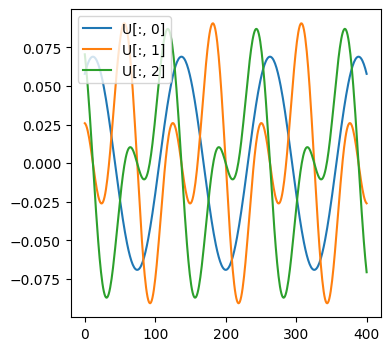

In [9]:
plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3]/5, label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()

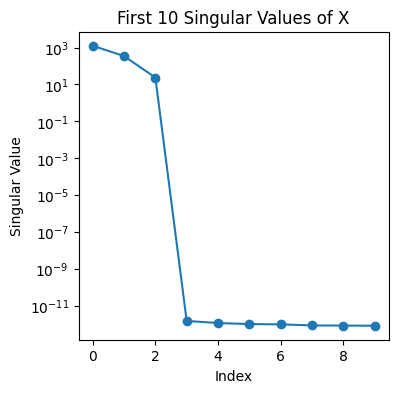

In [10]:
plt.figure(figsize=(4, 4))
plt.semilogy(np.diag(S[:10]), 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [11]:
print(np.diag(S[:4]))


[1.26729795e+03 3.47753903e+02 2.36922473e+01 1.46330630e-12]


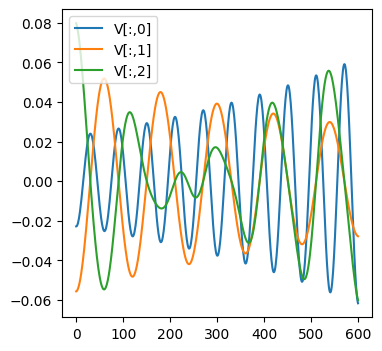

In [12]:
plt.figure(figsize=(4, 4))
plt.plot(V[:,0], label='V[:,0]')
plt.plot(V[:,1], label='V[:,1]')
plt.plot(V[:,2], label='V[:,2]')
#plt.plot(V[:,3]/5, label='V[:,3]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [13]:
r =3
Ur = U[:,:r]
Sr = S[:r,:r]
Vr = V[:,:r]
print(Ur.shape, Sr.shape, Vr.shape)

(401, 3) (3, 3) (600, 3)


In [14]:
print(X_2.shape)

(401, 600)


In [15]:
print(Ur[:3,:3])

[[0.05792337+0.00000000e+00j 0.0259382 +0.00000000e+00j
  0.07057417+0.00000000e+00j]
 [0.05972807-1.67483166e-05j 0.02537296+8.00545124e-06j
  0.0662026 +1.08038391e-05j]
 [0.0613835 -3.49786163e-05j 0.02438068+1.81105191e-05j
  0.06137872+2.20523335e-05j]]


In [16]:
A_tilde =  (Ur.conj().T) @ X_2 @ Vr @ np.linalg.inv(Sr)

In [17]:
print(A_tilde)

[[ 9.96180831e-01+1.04702255e-01j -1.36850493e-04-2.48852122e-06j
  -1.05026468e-04-2.39527051e-06j]
 [ 1.36748328e-04+5.86444035e-06j  9.97468880e-01+5.22754866e-02j
   3.96165470e-04+2.26995495e-05j]
 [ 1.04968946e-04+4.19279412e-06j  4.16904737e-04+2.03744597e-05j
   9.97295331e-01+5.22662443e-02j]]


In [18]:
Lambda, W = np.linalg.eig(A_tilde)

In [19]:
#Lambda = np.diag(Lambda)
print(Lambda)

[0.99618081+0.10470282j 0.99779769+0.05229236j 0.99696654+0.0522488j ]


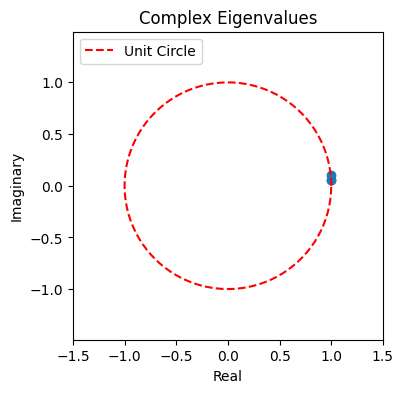

In [20]:
# Plot the eigenvalues in the complex plane
plt.figure(figsize=(4, 4))
plt.scatter(Lambda.real, Lambda.imag)

# Plot unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='r', label='Unit Circle')

plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Eigenvalues')
#plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [21]:
print(W)

[[ 9.99994586e-01+0.00000000e+00j -4.10647193e-05-3.28793946e-03j
   3.62245588e-07+4.36216581e-05j]
 [ 3.25990950e-05-2.61012014e-03j  7.69573550e-01+0.00000000e+00j
  -6.19322211e-01-2.59174393e-03j]
 [ 1.66371084e-05-2.00344291e-03j  6.38544124e-01-2.67218392e-03j
   7.85132651e-01+0.00000000e+00j]]


In [22]:
Phi = X_2 @ Vr @ np.linalg.inv(Sr) @ W

In [23]:
print(Phi[:3,:])

[[0.05772574+0.00585662j 0.06490031+0.00302204j 0.03923003+0.00199128j]
 [0.05952418+0.00603909j 0.0616799 +0.00287209j 0.03615694+0.00183529j]
 [0.06117383+0.00620645j 0.05784321+0.00269343j 0.03299347+0.00167472j]]


In [24]:
Omega = np.log(Lambda)/dt

In [25]:
print(Omega.shape, Omega)
print("Notice the imaginary parts", np.imag(Omega))


(3,) [ 0.2+12.56637061j -0.1 +6.28318531j -0.2 +6.28318531j]
Notice the imaginary parts [12.56637061  6.28318531  6.28318531]


In [26]:
amp = np.linalg.lstsq(Phi,X_1[:,0],rcond=None)[0]

In [27]:
print(amp.shape[0], amp)

3 [-28.77477662+2.91937449j -14.03645066+0.65359835j
  13.83182904-0.70209062j]


In [28]:
t_exp = np.arange(X.shape[1]) * dt
temp = np.repeat(Omega.reshape(-1,1), t_exp.size, axis=1)
dynamics = np.exp(temp * t_exp) * amp.reshape(amp.shape[0], -1)
print(t_exp.shape, temp.shape, dynamics.shape)
print(X.shape[1])
print(t_exp.size)

(601,) (3, 601) (3, 601)
601
601


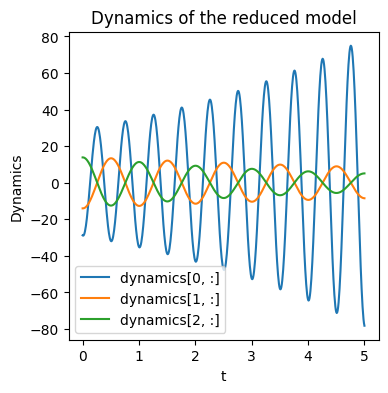

In [29]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.plot(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.plot(t_exp, dynamics[2, :], '-', label='dynamics[2, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


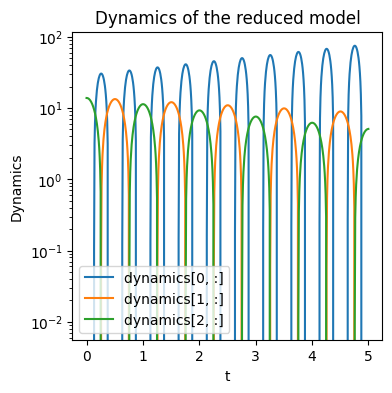

In [30]:
plt.figure(figsize=(4, 4))
plt.semilogy(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.semilogy(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.semilogy(t_exp, dynamics[2, :], '-', label='dynamics[2, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [32]:
X_dmd = Phi @ dynamics
print(X_dmd.shape)

(401, 601)


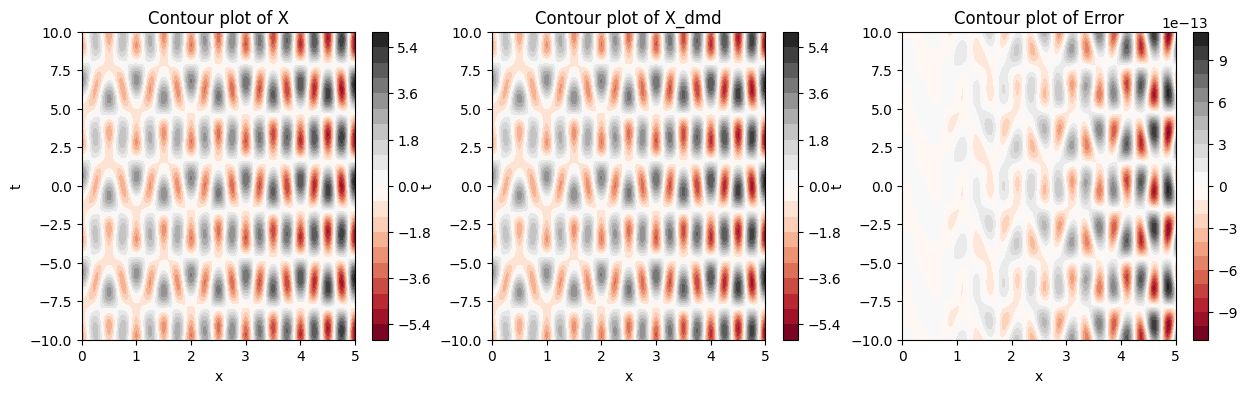

In [33]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1, 3, 2)
plt.contourf(tt, xx, np.real(X_dmd), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')

X_diff = np.real(X) - np.real(X_dmd)
#levels = np.linspace(-1E-11, 1E-11, 21)
levels = 20
plt.subplot(1, 3, 3)
plt.contourf(tt, xx, X_diff , levels=levels, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of Error')


plt.show()